<a href="https://colab.research.google.com/github/MilindiSenevirathne/DataMiningLabs/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preprocessing**

In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('sample_data/Crimes_-_2022.csv')
df.head()

ID Case Number                    Date                   Block  IUCR  \
0  12589893    JF109865  01/11/2022 03:00:00 PM    087XX S KINGSTON AVE  1565   
1  12592454    JF113025  01/14/2022 03:55:00 PM       067XX S MORGAN ST  2826   
2  12601676    JF124024  01/13/2022 04:00:00 PM    031XX W AUGUSTA BLVD  1752   
3  12785595    JF346553  08/05/2022 09:00:00 PM  072XX S UNIVERSITY AVE  1544   
4  12808281    JF373517  08/14/2022 02:00:00 PM     055XX W ARDMORE AVE  1562   

                 Primary Type  \
0                 SEX OFFENSE   
1               OTHER OFFENSE   
2  OFFENSE INVOLVING CHILDREN   
3                 SEX OFFENSE   
4                 SEX OFFENSE   

                                         Description Location Description  \
0                   INDECENT SOLICITATION OF A CHILD            RESIDENCE   
1                     HARASSMENT BY ELECTRONIC MEANS            RESIDENCE   
2  AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER            RESIDENCE   
3                     SEXUAL EXPLOITATION OF A CHILD            APARTMENT   
4                   AGGRAVATED CRIMINAL SEXUAL ABUSE            RESIDENCE   

   Arrest  Domestic  ...  Ward  Community Area  FBI Code  X Coordinate  \
0   False      True  ...   7.0              46        17     1194660.0   
1   False      True  ...  16.0              68        26     1170805.0   
2   False      True  ...  36.0              23        17     1155171.0   
3    True     False  ...   5.0              69        17     1185135.0   
4   False     False  ...  39.0              11        17     1138383.0   

  Y Coordinate  Year              Updated On   Latitude  Longitude  \
0    1847481.0  2022  09/14/2023 03:41:59 PM  41.736409 -87.562410   
1    1860170.0  2022  09/14/2023 03:41:59 PM  41.771782 -87.649437   
2    1906486.0  2022  09/14/2023 03:41:59 PM  41.899206 -87.705506   
3    1857211.0  2022  09/14/2023 03:41:59 PM  41.763338 -87.597001   
4    1937953.0  2022  09/14/2023 03:41:59 PM  41.985875 -87.766404   

                        Location  
0  (41.736409029, -87.562410309)  
1  (41.771782439, -87.649436929)  
2  (41.899206068, -87.705505587)  
3  (41.763337967, -87.597001131)  
4  (41.985875279, -87.766403857)  

[5 rows x 22 columns]

In [11]:
df.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     878
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            5995
Y Coordinate            5995
Year                       0
Updated On                 0
Latitude                5995
Longitude               5995
Location                5995
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
print('Before Dropping Duplicates: ' + str(df.shape))
df.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('After Dropping Duplicates: ' + str(df.shape))

Before Dropping Duplicates: (232452, 22)
After Dropping Duplicates: (232452, 22)


In [15]:
df.drop(columns=['Unnamed: 0', 'ID', 'Case Number', 'IUCR', 'FBI Code',
                     'Location', 'X Coordinate', 'Y Coordinate', 'Updated On'],
            axis=1, inplace=True, errors='ignore')
df.head(10)

Date                   Block  \
0   01/11/2022 03:00:00 PM    087XX S KINGSTON AVE   
1   01/14/2022 03:55:00 PM       067XX S MORGAN ST   
2   01/13/2022 04:00:00 PM    031XX W AUGUSTA BLVD   
3   08/05/2022 09:00:00 PM  072XX S UNIVERSITY AVE   
4   08/14/2022 02:00:00 PM     055XX W ARDMORE AVE   
5   11/10/2022 03:47:00 AM          072XX S MAY ST   
10  02/19/2022 10:36:00 AM   010XX N FRANCISCO AVE   
11  03/13/2022 05:15:00 AM      012XX W PRATT BLVD   
12  04/10/2022 09:38:00 PM      011XX N CHERRY AVE   
13  04/14/2022 10:10:00 PM         003XX E OHIO ST   

                  Primary Type  \
0                  SEX OFFENSE   
1                OTHER OFFENSE   
2   OFFENSE INVOLVING CHILDREN   
3                  SEX OFFENSE   
4                  SEX OFFENSE   
5            WEAPONS VIOLATION   
10                     BATTERY   
11                     BATTERY   
12               OTHER OFFENSE   
13                     BATTERY   

                                          Description  \
0                    INDECENT SOLICITATION OF A CHILD   
1                      HARASSMENT BY ELECTRONIC MEANS   
2   AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER   
3                      SEXUAL EXPLOITATION OF A CHILD   
4                    AGGRAVATED CRIMINAL SEXUAL ABUSE   
5                          RECKLESS FIREARM DISCHARGE   
10                            DOMESTIC BATTERY SIMPLE   
11                            DOMESTIC BATTERY SIMPLE   
12                        VIOLATE ORDER OF PROTECTION   
13                            DOMESTIC BATTERY SIMPLE   

           Location Description  Arrest  Domestic  Beat  District  Ward  \
0                     RESIDENCE   False      True   423         4   7.0   
1                     RESIDENCE   False      True   724         7  16.0   
2                     RESIDENCE   False      True  1211        12  36.0   
3                     APARTMENT    True     False   324         3   5.0   
4                     RESIDENCE   False     False  1621        16  39.0   
5                        STREET   False     False   733         7  17.0   
10  HOSPITAL BUILDING / GROUNDS    True      True  1211        12  26.0   
11                    RESIDENCE    True      True  2431        24  49.0   
12                    WAREHOUSE    True      True  1822        18  27.0   
13         VEHICLE - COMMERCIAL    True      True  1834        18   2.0   

    Community Area  Year   Latitude  Longitude  
0               46  2022  41.736409 -87.562410  
1               68  2022  41.771782 -87.649437  
2               23  2022  41.899206 -87.705506  
3               69  2022  41.763338 -87.597001  
4               11  2022  41.985875 -87.766404  
5               68  2022  41.762615 -87.652840  
10              24  2022  41.900506 -87.699285  
11               1  2022  42.005522 -87.662241  
12               8  2022  41.901497 -87.652407  
13               8  2022  41.892632 -87.618363

In [16]:
df.isnull().sum(axis=0)

Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
Year                    0
Latitude                0
Longitude               0
dtype: int64

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df['Date'])

In [18]:
df['Month'] = df.index.month.astype(int)
df['Weekday'] = df.index.weekday.astype(int)
df.head(10)

Date                   Block  \
Date                                                              
2022-01-11 15:00:00 2022-01-11 15:00:00    087XX S KINGSTON AVE   
2022-01-14 15:55:00 2022-01-14 15:55:00       067XX S MORGAN ST   
2022-01-13 16:00:00 2022-01-13 16:00:00    031XX W AUGUSTA BLVD   
2022-08-05 21:00:00 2022-08-05 21:00:00  072XX S UNIVERSITY AVE   
2022-08-14 14:00:00 2022-08-14 14:00:00     055XX W ARDMORE AVE   
2022-11-10 03:47:00 2022-11-10 03:47:00          072XX S MAY ST   
2022-02-19 10:36:00 2022-02-19 10:36:00   010XX N FRANCISCO AVE   
2022-03-13 05:15:00 2022-03-13 05:15:00      012XX W PRATT BLVD   
2022-04-10 21:38:00 2022-04-10 21:38:00      011XX N CHERRY AVE   
2022-04-14 22:10:00 2022-04-14 22:10:00         003XX E OHIO ST   

                                   Primary Type  \
Date                                              
2022-01-11 15:00:00                 SEX OFFENSE   
2022-01-14 15:55:00               OTHER OFFENSE   
2022-01-13 16:00:00  OFFENSE INVOLVING CHILDREN   
2022-08-05 21:00:00                 SEX OFFENSE   
2022-08-14 14:00:00                 SEX OFFENSE   
2022-11-10 03:47:00           WEAPONS VIOLATION   
2022-02-19 10:36:00                     BATTERY   
2022-03-13 05:15:00                     BATTERY   
2022-04-10 21:38:00               OTHER OFFENSE   
2022-04-14 22:10:00                     BATTERY   

                                                           Description  \
Date                                                                     
2022-01-11 15:00:00                   INDECENT SOLICITATION OF A CHILD   
2022-01-14 15:55:00                     HARASSMENT BY ELECTRONIC MEANS   
2022-01-13 16:00:00  AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER   
2022-08-05 21:00:00                     SEXUAL EXPLOITATION OF A CHILD   
2022-08-14 14:00:00                   AGGRAVATED CRIMINAL SEXUAL ABUSE   
2022-11-10 03:47:00                         RECKLESS FIREARM DISCHARGE   
2022-02-19 10:36:00                            DOMESTIC BATTERY SIMPLE   
2022-03-13 05:15:00                            DOMESTIC BATTERY SIMPLE   
2022-04-10 21:38:00                        VIOLATE ORDER OF PROTECTION   
2022-04-14 22:10:00                            DOMESTIC BATTERY SIMPLE   

                            Location Description  Arrest  Domestic  Beat  \
Date                                                                       
2022-01-11 15:00:00                    RESIDENCE   False      True   423   
2022-01-14 15:55:00                    RESIDENCE   False      True   724   
2022-01-13 16:00:00                    RESIDENCE   False      True  1211   
2022-08-05 21:00:00                    APARTMENT    True     False   324   
2022-08-14 14:00:00                    RESIDENCE   False     False  1621   
2022-11-10 03:47:00                       STREET   False     False   733   
2022-02-19 10:36:00  HOSPITAL BUILDING / GROUNDS    True      True  1211   
2022-03-13 05:15:00                    RESIDENCE    True      True  2431   
2022-04-10 21:38:00                    WAREHOUSE    True      True  1822   
2022-04-14 22:10:00         VEHICLE - COMMERCIAL    True      True  1834   

                     District  Ward  Community Area  Year   Latitude  \
Date                                                                   
2022-01-11 15:00:00         4   7.0              46  2022  41.736409   
2022-01-14 15:55:00         7  16.0              68  2022  41.771782   
2022-01-13 16:00:00        12  36.0              23  2022  41.899206   
2022-08-05 21:00:00         3   5.0              69  2022  41.763338   
2022-08-14 14:00:00        16  39.0              11  2022  41.985875   
2022-11-10 03:47:00         7  17.0              68  2022  41.762615   
2022-02-19 10:36:00        12  26.0              24  2022  41.900506   
2022-03-13 05:15:00        24  49.0               1  2022  42.005522   
2022-04-10 21:38:00        18  27.0               8  2022  41.901497   
2022-04-14 22:10:00    

In [20]:
crimes_date = df[['Primary Type', 'Location Description', 'Year', 'Month', 'Weekday']]
crimes_date.head(5)

Primary Type Location Description  Year  \
Date                                                                         
2022-01-11 15:00:00                 SEX OFFENSE            RESIDENCE  2022   
2022-01-14 15:55:00               OTHER OFFENSE            RESIDENCE  2022   
2022-01-13 16:00:00  OFFENSE INVOLVING CHILDREN            RESIDENCE  2022   
2022-08-05 21:00:00                 SEX OFFENSE            APARTMENT  2022   
2022-08-14 14:00:00                 SEX OFFENSE            RESIDENCE  2022   

                     Month  Weekday  
Date                                 
2022-01-11 15:00:00      1        1  
2022-01-14 15:55:00      1        4  
2022-01-13 16:00:00      1        3  
2022-08-05 21:00:00      8        4  
2022-08-14 14:00:00      8        6

In [21]:
df.drop(columns=['Date'], axis=1, inplace=True, errors='ignore')
df.head(10)

Block                Primary Type  \
Date                                                                      
2022-01-11 15:00:00    087XX S KINGSTON AVE                 SEX OFFENSE   
2022-01-14 15:55:00       067XX S MORGAN ST               OTHER OFFENSE   
2022-01-13 16:00:00    031XX W AUGUSTA BLVD  OFFENSE INVOLVING CHILDREN   
2022-08-05 21:00:00  072XX S UNIVERSITY AVE                 SEX OFFENSE   
2022-08-14 14:00:00     055XX W ARDMORE AVE                 SEX OFFENSE   
2022-11-10 03:47:00          072XX S MAY ST           WEAPONS VIOLATION   
2022-02-19 10:36:00   010XX N FRANCISCO AVE                     BATTERY   
2022-03-13 05:15:00      012XX W PRATT BLVD                     BATTERY   
2022-04-10 21:38:00      011XX N CHERRY AVE               OTHER OFFENSE   
2022-04-14 22:10:00         003XX E OHIO ST                     BATTERY   

                                                           Description  \
Date                                                                     
2022-01-11 15:00:00                   INDECENT SOLICITATION OF A CHILD   
2022-01-14 15:55:00                     HARASSMENT BY ELECTRONIC MEANS   
2022-01-13 16:00:00  AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER   
2022-08-05 21:00:00                     SEXUAL EXPLOITATION OF A CHILD   
2022-08-14 14:00:00                   AGGRAVATED CRIMINAL SEXUAL ABUSE   
2022-11-10 03:47:00                         RECKLESS FIREARM DISCHARGE   
2022-02-19 10:36:00                            DOMESTIC BATTERY SIMPLE   
2022-03-13 05:15:00                            DOMESTIC BATTERY SIMPLE   
2022-04-10 21:38:00                        VIOLATE ORDER OF PROTECTION   
2022-04-14 22:10:00                            DOMESTIC BATTERY SIMPLE   

                            Location Description  Arrest  Domestic  Beat  \
Date                                                                       
2022-01-11 15:00:00                    RESIDENCE   False      True   423   
2022-01-14 15:55:00                    RESIDENCE   False      True   724   
2022-01-13 16:00:00                    RESIDENCE   False      True  1211   
2022-08-05 21:00:00                    APARTMENT    True     False   324   
2022-08-14 14:00:00                    RESIDENCE   False     False  1621   
2022-11-10 03:47:00                       STREET   False     False   733   
2022-02-19 10:36:00  HOSPITAL BUILDING / GROUNDS    True      True  1211   
2022-03-13 05:15:00                    RESIDENCE    True      True  2431   
2022-04-10 21:38:00                    WAREHOUSE    True      True  1822   
2022-04-14 22:10:00         VEHICLE - COMMERCIAL    True      True  1834   

                     District  Ward  Community Area  Year   Latitude  \
Date                                                                   
2022-01-11 15:00:00         4   7.0              46  2022  41.736409   
2022-01-14 15:55:00         7  16.0              68  2022  41.771782   
2022-01-13 16:00:00        12  36.0              23  2022  41.899206   
2022-08-05 21:00:00         3   5.0              69  2022  41.763338   
2022-08-14 14:00:00        16  39.0              11  2022  41.985875   
2022-11-10 03:47:00         7  17.0              68  2022  41.762615   
2022-02-19 10:36:00        12  26.0              24  2022  41.900506   
2022-03-13 05:15:00        24  49.0               1  2022  42.005522   
2022-04-10 21:38:00        18  27.0               8  2022  41.901497   
2022-04-14 22:10:00        18   2.0               8  2022  41.892632   

                     Longitude  Month  Weekday  
Date                                            
2022-01-11 15:00:00 -87.562410      1        1  
2022-01-14 15:55:00 -87.649437      1        4  
2022-01-13 16:00:00 -87.705506      1        3  
2022-08-05 21:00:00 -87.597001      8        4  
2022-08-14 14:00:00 -87.766404      8        6  
2022-11-10 03:47:00 -87.652840     11        3  
2022-02-19 10:36:00 -87.699285      2        5  
2022-03-13 05:15:00 -87.66224

In [22]:
value_counts = df['Year'].value_counts()
print(value_counts)

2022    232452
Name: Year, dtype: int64


In [23]:
df.drop(df[df['Year'] == 2017].index, inplace=True, errors='ignore')
value_counts = df['Year'].value_counts()
print(value_counts)

2022    232452
Name: Year, dtype: int64


In [24]:
value_counts = df['Primary Type'].value_counts()
print(value_counts)

THEFT                                53137
BATTERY                              40687
CRIMINAL DAMAGE                      26912
MOTOR VEHICLE THEFT                  21247
ASSAULT                              20692
OTHER OFFENSE                        14221
DECEPTIVE PRACTICE                   14194
ROBBERY                               8944
WEAPONS VIOLATION                     8696
BURGLARY                              7512
CRIMINAL TRESPASS                     4189
NARCOTICS                             3966
OFFENSE INVOLVING CHILDREN            1766
CRIMINAL SEXUAL ASSAULT               1472
SEX OFFENSE                           1129
HOMICIDE                               726
PUBLIC PEACE VIOLATION                 704
STALKING                               420
ARSON                                  419
INTERFERENCE WITH PUBLIC OFFICER       391
PROSTITUTION                           283
LIQUOR LAW VIOLATION                   200
CONCEALED CARRY LICENSE VIOLATION      176
INTIMIDATIO

In [25]:
value_counts = df['Primary Type'].value_counts()
remove_values = value_counts[value_counts < 1000].index
crimes_final = df[~df['Primary Type'].isin(remove_values)]

In [26]:
value_counts = crimes_final['Primary Type'].value_counts()
print(value_counts)

THEFT                         53137
BATTERY                       40687
CRIMINAL DAMAGE               26912
MOTOR VEHICLE THEFT           21247
ASSAULT                       20692
OTHER OFFENSE                 14221
DECEPTIVE PRACTICE            14194
ROBBERY                        8944
WEAPONS VIOLATION              8696
BURGLARY                       7512
CRIMINAL TRESPASS              4189
NARCOTICS                      3966
OFFENSE INVOLVING CHILDREN     1766
CRIMINAL SEXUAL ASSAULT        1472
SEX OFFENSE                    1129
Name: Primary Type, dtype: int64


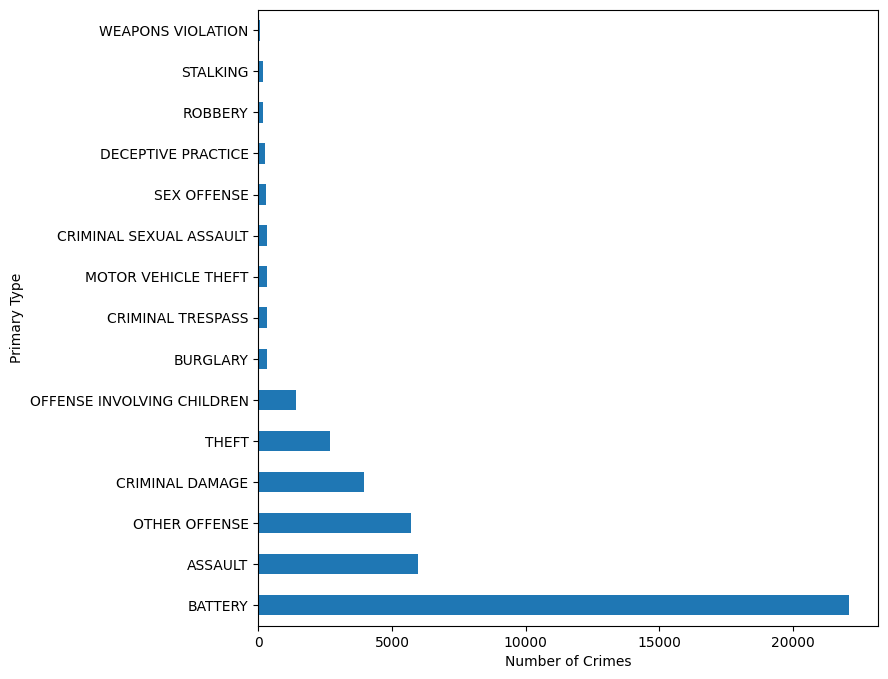

In [27]:
import matplotlib.pyplot as plt

domestic = df[df['Domestic'] == True]

plt.figure(figsize=(8, 8))
domestic.groupby([domestic['Primary Type']]).size().sort_values(ascending=False)[:15].plot(kind='barh')
plt.xlabel('Number of Crimes')
plt.ylabel('Primary Type')
plt.show()

In [29]:
from google.colab import files
file_name = 'Chicago_Crimes_2001_to_2016.csv'
crimes_final.to_csv(file_name, encoding='utf-8', index=False)
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [34]:
final_df = pd.read_csv('Chicago_Crimes_2001_to_2016.csv')
final_df.head()

Block                Primary Type  \
0    087XX S KINGSTON AVE                 SEX OFFENSE   
1       067XX S MORGAN ST               OTHER OFFENSE   
2    031XX W AUGUSTA BLVD  OFFENSE INVOLVING CHILDREN   
3  072XX S UNIVERSITY AVE                 SEX OFFENSE   
4     055XX W ARDMORE AVE                 SEX OFFENSE   

                                         Description Location Description  \
0                   INDECENT SOLICITATION OF A CHILD            RESIDENCE   
1                     HARASSMENT BY ELECTRONIC MEANS            RESIDENCE   
2  AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER            RESIDENCE   
3                     SEXUAL EXPLOITATION OF A CHILD            APARTMENT   
4                   AGGRAVATED CRIMINAL SEXUAL ABUSE            RESIDENCE   

   Arrest  Domestic  Beat  District  Ward  Community Area  Year   Latitude  \
0   False      True   423         4   7.0              46  2022  41.736409   
1   False      True   724         7  16.0              68  2022  41.771782   
2   False      True  1211        12  36.0              23  2022  41.899206   
3    True     False   324         3   5.0              69  2022  41.763338   
4   False     False  1621        16  39.0              11  2022  41.985875   

   Longitude  Month  Weekday  
0 -87.562410      1        1  
1 -87.649437      1        4  
2 -87.705506      1        3  
3 -87.597001      8        4  
4 -87.766404      8        6

In [35]:
total_df = final_df[['Block', 'Primary Type', 'Description',
                      'Location Description', 'Arrest', 'Domestic', 'Beat',
                      'District', 'Year', 'Latitude', 'Longitude', 'Month', 'Weekday']]

In [36]:
# Dropping rows for district, Latitude and Longitude NaN values
total_df = total_df.dropna(subset = ['District'])
total_df = total_df.dropna(subset = ['Latitude'])
total_df = total_df.dropna(subset = ['Longitude'])

In [37]:
Block_temp = []
Block_num = []
Block_street = []
temp_df = total_df[['Block']]
for index, row in temp_df.iterrows():
    Block_temp.append(row['Block'])

pattern = r'\((.+)'
pattern1 = "X (.+)"
pattern2 = "(.+)X "
pattern3 = r'\d+'

i=0
temp=[]
for data in Block_num:
    if data == 0:
        temp.append(i)
    i+=1

Block_temp1 = [s for s in Block_temp if s != 'XX  UNKNOWN'] #3176540,3186101
i=0
for data in Block_temp1:
    #print(data)
    Block_street.append(re.findall(pattern1, data)[0])
    Block_num.append(int(re.findall(pattern3, data)[0]))
    i+=1

In [38]:
# Get names of indexes for which column Block has value XX UNKNOWN
indexNames = total_df[ total_df['Block'] == 'XX  UNKNOWN'].index

In [39]:
# Delete these row indexes from dataFrame
total_df.drop(indexNames , inplace=True)

In [40]:
# Adding new Block features to the dataframe
total_df["Block_Street"] = Block_street
total_df["Block_Num"] = Block_num

In [41]:
# Encoding string values:
le = LabelEncoder()
Block_array = le.fit_transform(total_df['Block'])
Block_street_array = le.fit_transform(total_df['Block_Street'])
total_df = total_df.drop(columns=['Block', 'Block_Street'])
total_df['Block'] = Block_array
total_df['Block_Street'] = Block_street_array

total_df['Block_Num'] = total_df.Block_Num.astype(int)
total_df['Beat'] = total_df.Beat.astype(int)
total_df['District'] = total_df.District.astype(int)

In [43]:
# Encoding all remaining columns:
le = LabelEncoder()
Primary_Type_array = le.fit_transform(total_df['Primary Type'])
Description_array = le.fit_transform(total_df['Description'])
Location_Description_array = le.fit_transform(total_df['Location Description'])
Arrest_array = le.fit_transform(total_df['Arrest'])
Domestic_array = le.fit_transform(total_df['Domestic'])
Year_array = le.fit_transform(total_df['Year'])

total_df = total_df.drop(columns=['Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic'])
total_df = total_df.drop(columns=['Year'])
total_df['Primary Type'] = Primary_Type_array
total_df['Description'] = Description_array
total_df['Location Description'] = Location_Description_array
total_df['Arrest'] = Arrest_array
total_df['Domestic'] = Domestic_array
total_df['Year'] = Year_array

In [45]:
# Observing Maximum of each column:
print(total_df['Primary Type'].max())
print(total_df['Description'].max())
print(total_df['Location Description'].max())
print(total_df['Domestic'].max())

14
223
102
1


In [47]:
# Saving final dataframe:
total_df.to_csv('total_df.csv')

In [48]:
# Analyzing Arrest Skew:
indexNames = final_df[ final_df['Arrest'] == 'False'].index
indexNames = total_df[ total_df['Arrest'] == 1].index

#**Decision Tree**

In [49]:
new_df = pd.read_csv('total_df.csv')
new_df.head()

Unnamed: 0  Beat  District   Latitude  Longitude  Month  Weekday  \
0           0   423         4  41.736409 -87.562410      1        1   
1           1   724         7  41.771782 -87.649437      1        4   
2           2  1211        12  41.899206 -87.705506      1        3   
3           3   324         3  41.763338 -87.597001      8        4   
4           4  1621        16  41.985875 -87.766404      8        6   

   Block_Num  Block  Block_Street  Primary Type  Description  \
0         87  24720          1253            12          114   
1         67  21984          1356            10          107   
2         31  12167          1779             9           13   
3         72  22813          1477            12          175   
4         55  19114          1770            12           12   

   Location Description  Arrest  Domestic  Year  
0                    79       0         1     0  
1                    79       0         1     0  
2                    79       0         1     0  
3                    17       1         0     0  
4                    79       0         0     0

In [161]:
drop_colmns = ['Beat', 'Latitude', 'Longitude', 'Block_Num', 'Block', 'Block_Street', 'Description', 'Year', 'District', 'Description', 'Unnamed: 0']
df_dropped = new_df.drop(columns=drop_colmns)

In [162]:
df_dropped.head()

Month  Weekday  Primary Type  Location Description  Arrest  Domestic
0      1        1            12                    79       0         1
1      1        4            10                    79       0         1
2      1        3             9                    79       0         1
3      8        4            12                    17       1         0
4      8        6            12                    79       0         0

##**Decision Tree - Imbalanced Problem**

False    203501
True      25263
Name: Arrest, dtype: int64

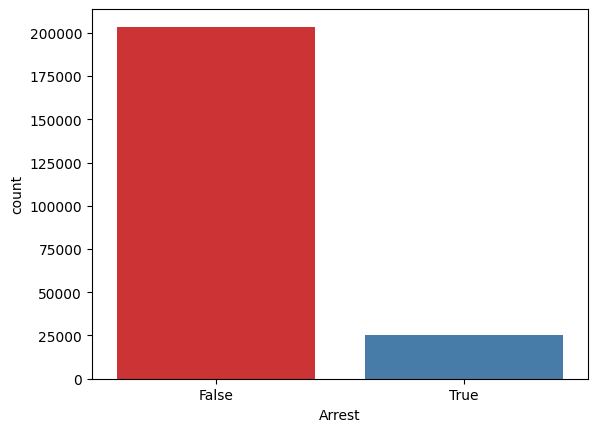

In [171]:
sns.countplot(x='Arrest', data=crimes_final, palette='Set1')
crimes_final['Arrest'].value_counts()

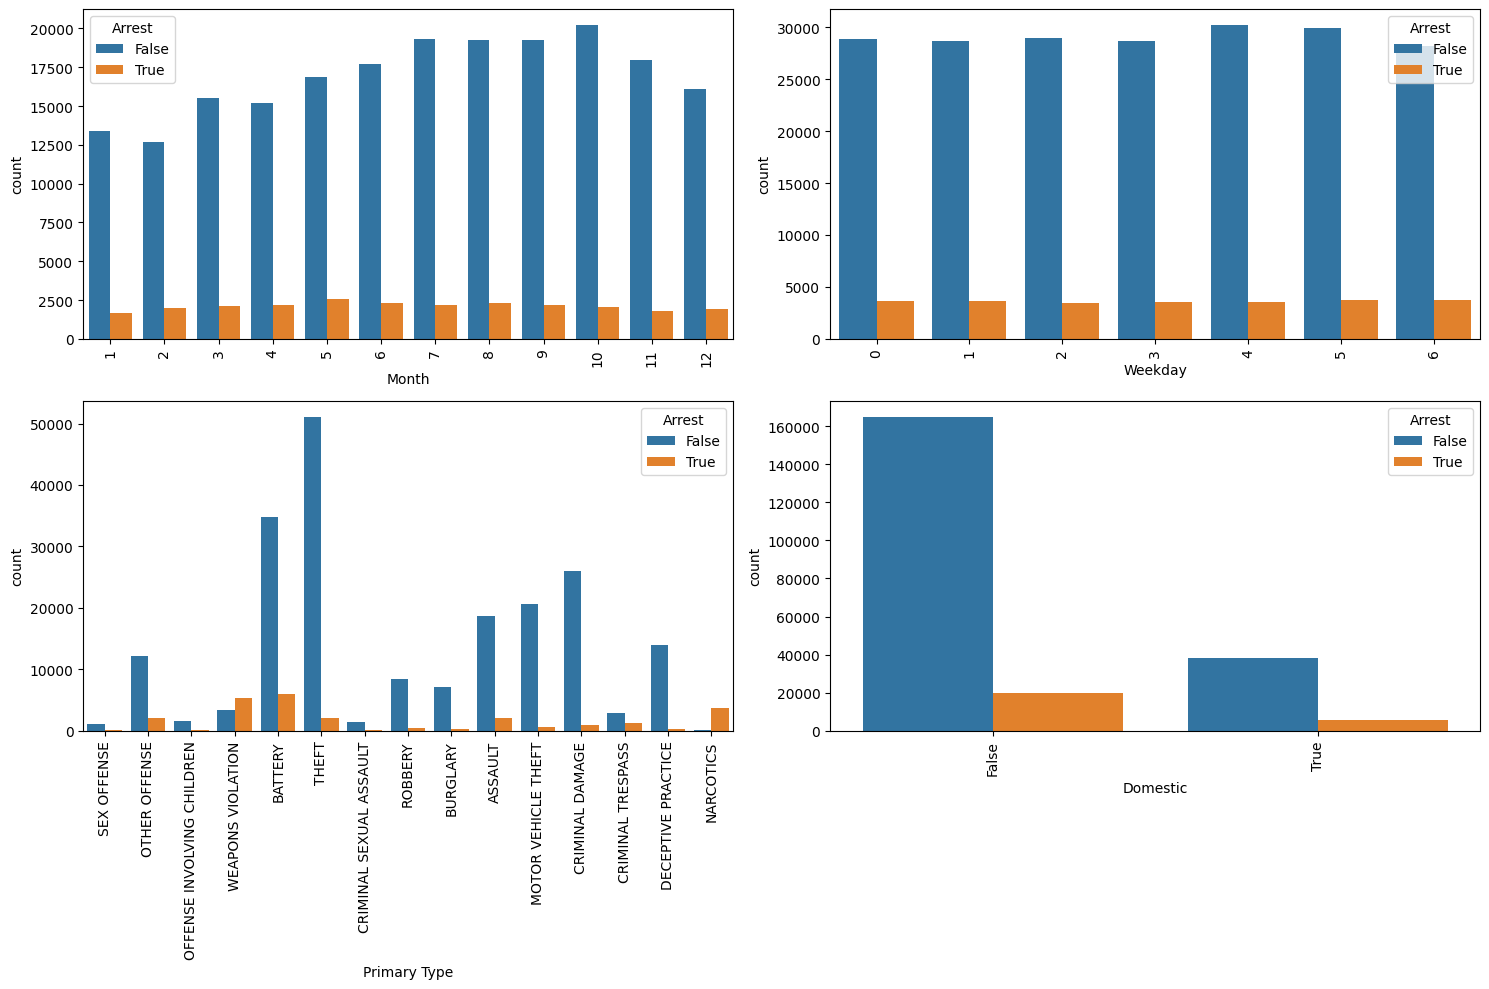

In [172]:
# list of categorical variables to plot
cat_vars = ['Month',	'Weekday',	'Primary Type',	'Domestic']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Arrest', data=crimes_final, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

In [163]:
X = df_dropped.drop('Arrest', axis=1)
y = df_dropped['Arrest']

In [164]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [165]:
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [166]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=6, min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [167]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 91.64 %


In [168]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.9164207811509628
Precision Score :  0.9164207811509628
Recall Score :  0.9164207811509628
Jaccard Score :  0.8457349174012143


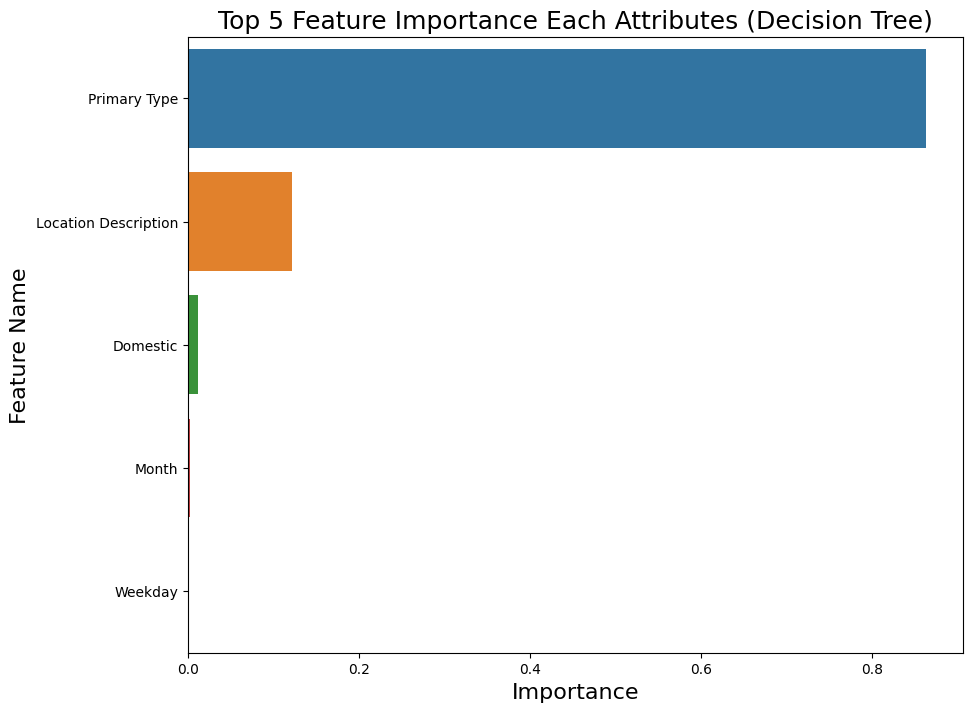

In [169]:
import seaborn as sns
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 5 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

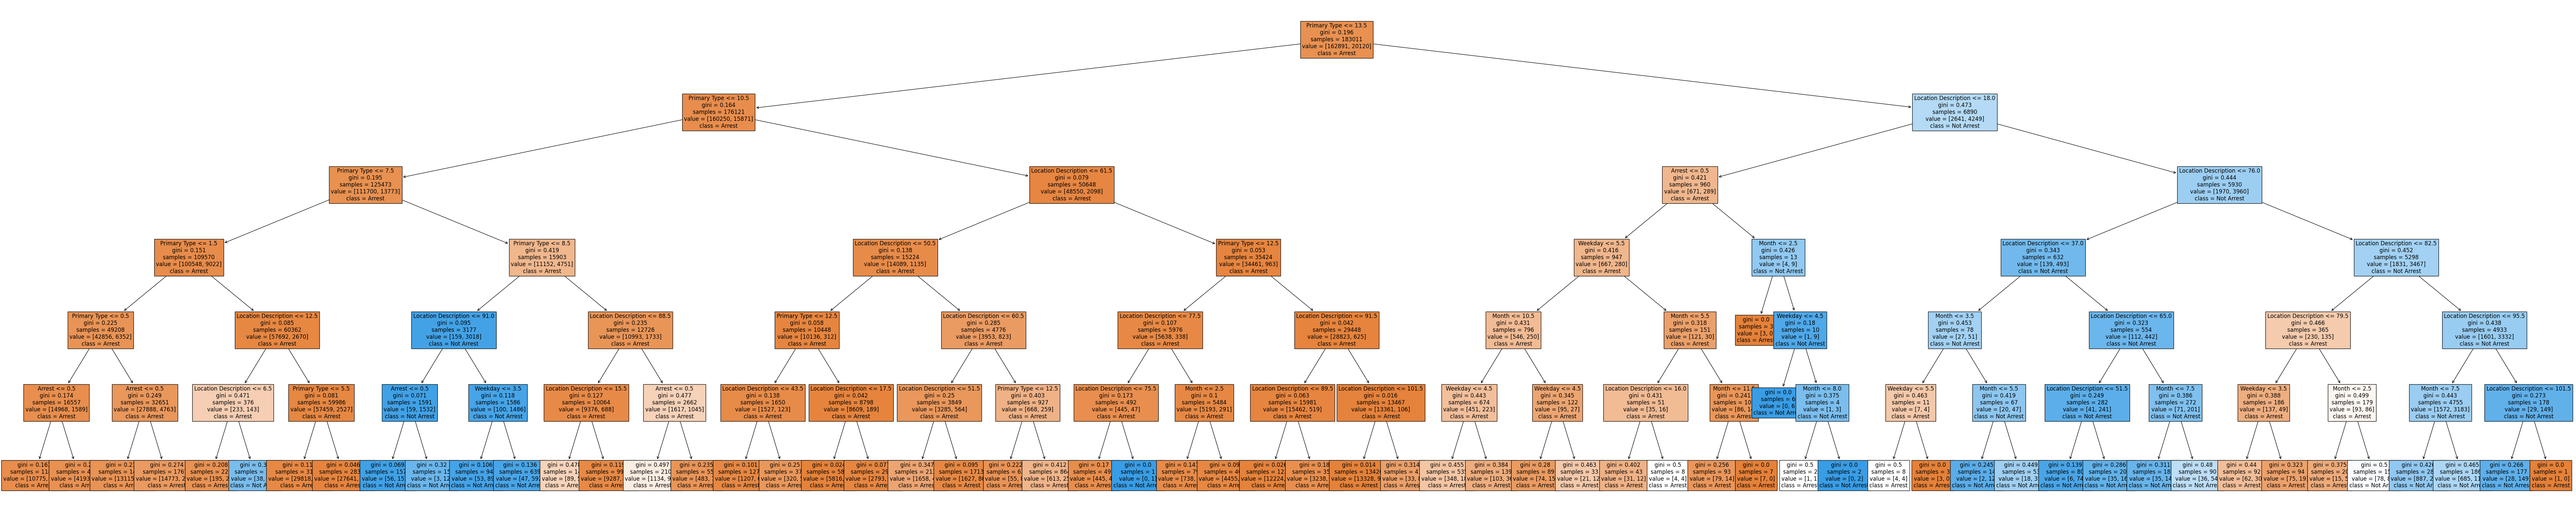

In [170]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(100,20))
a = plot_tree(dtree, feature_names=df_dropped.columns, fontsize=12, filled=True,
              class_names=['Arrest', 'Not Arrest'])

In [190]:
from sklearn.tree import export_graphviz
import graphviz

feature_names = ['Month', 'Weekday', 'Primary Type', 'Location Description', 'Domestic']

# Export the decision tree to a Graphviz DOT format
dot_data = export_graphviz(dtree, out_file=None, feature_names=feature_names, class_names=['Arrest', 'Not Arrest'], filled=True, rounded=True)

# Create a Graphviz object from the DOT data
graph = graphviz.Source(dot_data)

# Save the tree as a PDF file
graph.render("decision_tree_imbalanced")


'decision_tree_imbalanced.pdf'

In [191]:
# Create a NumPy array with the collected data
new_data = np.array([[ 3.0, 5.0, 15.0, 16.0, 0.5]])

# new_data = np.array([[ 55,	64,	112, 65, 300.0, 1.08, 0.003, 0.]])
# Use the trained model to make predictions on the new data
predicted_class = dtree.predict(new_data)

# Interpret the prediction
if predicted_class == 1:
    print("The person is arrested.")
else:
    print("The person is not arrested.")

The person is not arrested.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [173]:
# Undersampling majority class
from imblearn.under_sampling import RandomUnderSampler

X = df_dropped.drop('Arrest', axis=1)
y = df_dropped['Arrest']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# create new DataFrame with undersampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

##**Decision Tree - Balanced Problem**

0    25263
1    25263
Name: Arrest, dtype: int64

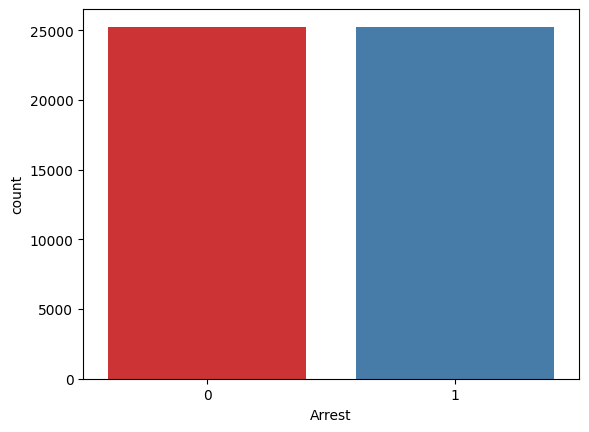

In [174]:
sns.countplot(x='Arrest', data=df_resampled, palette='Set1')
df_resampled['Arrest'].value_counts()

In [175]:
X = df_resampled.drop('Arrest', axis=1)
y = df_resampled['Arrest']

In [176]:
#test size 20% and train size 80%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [177]:
dtree2 = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree2, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [178]:
dtree2 = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=3, min_samples_split=3)
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3,
                       random_state=0)

In [179]:
y_pred = dtree2.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 75.26 %


In [180]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7526222046309123
Precision Score :  0.7526222046309123
Recall Score :  0.7526222046309123
Jaccard Score :  0.6033634777090274


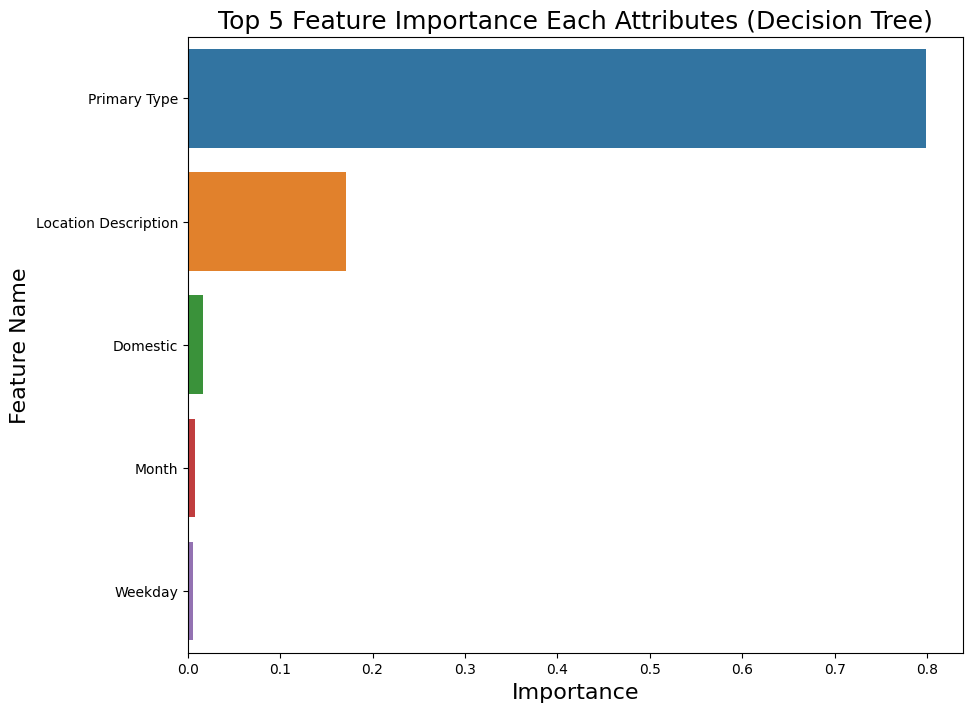

In [181]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree2.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 5 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

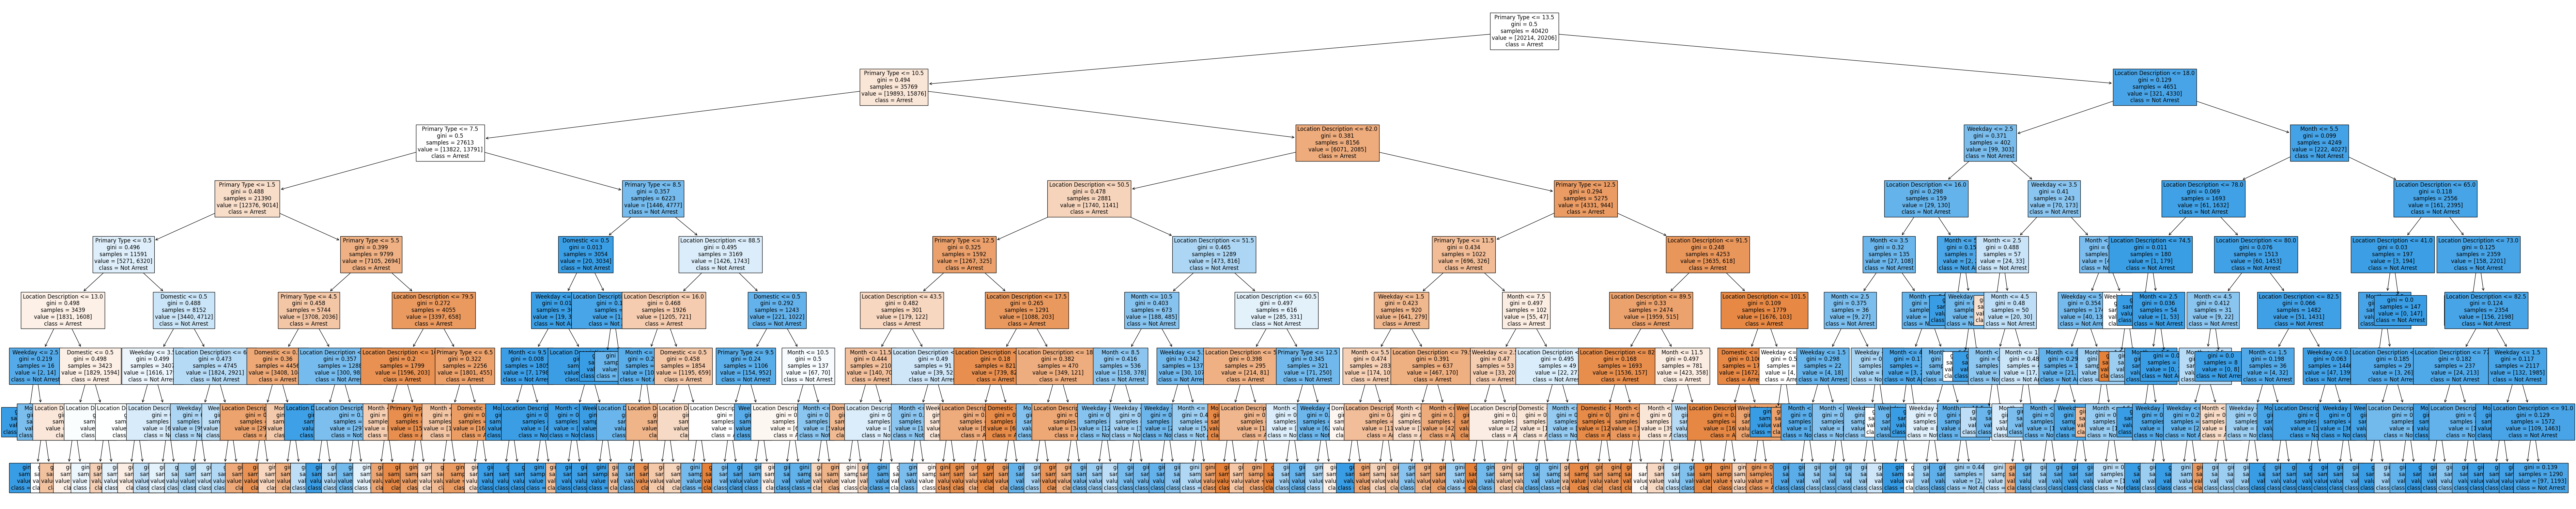

In [182]:
fig = plt.figure(figsize=(100,20))
a = plot_tree(dtree2, feature_names=df_resampled.columns, fontsize=12, filled=True,
              class_names=['Arrest', 'Not Arrest'])

In [192]:
# Export the decision tree to a Graphviz DOT format
dot_data = export_graphviz(dtree2, out_file=None, feature_names=feature_names, class_names=['Arrest', 'Not Arrest'], filled=True, rounded=True)

# Create a Graphviz object from the DOT data
graph = graphviz.Source(dot_data)

# Save the tree as a PDF file
graph.render("decision_tree_balanced")

'decision_tree_balanced.pdf'

In [185]:
# Create a NumPy array with the collected data
new_data = np.array([[ 3.0, 5.0, 15.0, 16.0, 0.5]])

# new_data = np.array([[ 55,	64,	112, 65, 300.0, 1.08, 0.003, 0.]])
# Use the trained model to make predictions on the new data
predicted_class = dtree2.predict(new_data)

# Interpret the prediction
if predicted_class == 1:
    print("The person is arrested.")
else:
    print("The person is not arrested.")

The person is arrested.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
